In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:

url = "https://data.cityofnewyork.us/resource/76xm-jjuj.csv?$limit=60000"
main_df1 = pd.read_csv(url)

main_df1.head()


,cad_incident_id,incident_datetime,initial_call_type,initial_severity_level_code,final_call_type,final_severity_level_code,first_assignment_datetime,valid_dispatch_rspns_time_indc,dispatch_response_seconds_qy,first_activation_datetime,...,zipcode,policeprecinct,citycouncildistrict,communitydistrict,communityschooldistrict,congressionaldistrict,reopen_indicator,special_event_indicator,standby_indicator,transfer_indicator
0,230010001,2023-01-01T00:00:02.000,UNKNOW,4,UNKNOW,4,2023-01-01T00:23:32.000,Y,1410,2023-01-01T00:23:47.000,...,10128.0,19.0,4.0,108.0,2.0,12.0,Y,N,N,N
1,230010002,2023-01-01T00:00:16.000,RESPFC,4,RESPFC,4,2023-01-01T00:01:22.000,Y,66,2023-01-01T01:42:19.000,...,11221.0,79.0,36.0,303.0,16.0,8.0,N,N,N,N
2,230010003,2023-01-01T00:00:30.000,DIFFFC,2,DIFFFC,2,2023-01-01T00:02:24.000,Y,114,2023-01-01T00:02:33.000,...,10463.0,52.0,14.0,207.0,10.0,13.0,N,N,N,N
3,230010004,2023-01-01T00:01:35.000,INJURY,5,INJURY,5,2023-01-01T01:03:40.000,Y,3725,2023-01-01T01:03:40.000,...,10018.0,14.0,3.0,104.0,2.0,10.0,N,N,N,N
4,230010007,2023-01-01T00:01:55.000,DRUG,4,DRUG,4,2023-01-01T00:23:42.000,Y,1307,2023-01-01T00:23:55.000,...,10034.0,34.0,10.0,112.0,6.0,13.0,N,N,N,N


In [ ]:
main_df1.isna().sum()

cad_incident_id                       0
incident_datetime                     0
initial_call_type                     0
initial_severity_level_code           0
final_call_type                       0
final_severity_level_code             0
first_assignment_datetime           777
valid_dispatch_rspns_time_indc        0
dispatch_response_seconds_qy          0
first_activation_datetime           874
first_on_scene_datetime            2638
valid_incident_rspns_time_indc        0
incident_response_seconds_qy       2642
incident_travel_tm_seconds_qy      2638
first_to_hosp_datetime            21775
first_hosp_arrival_datetime       21947
incident_close_datetime               0
held_indicator                        0
incident_disposition_code             0
borough                               0
incident_dispatch_area                0
zipcode                             528
policeprecinct                      527
citycouncildistrict                 527
communitydistrict                   527


In [ ]:
main_df1.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime', 'incident_close_datetime',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator'],
      dtype='object')

In [ ]:
main_df1['dispatch_response_seconds_qy']

0        1410
1          66
2         114
3        3725
4        1307
         ... 
59995      18
59996      21
59997      78
59998      13
59999      11
Name: dispatch_response_seconds_qy, Length: 60000, dtype: int64

In [ ]:
import pickle

with open("nyc_911_calls.pkl", "wb") as f:
    pickle.dump(main_df1, f)

In [16]:

with open("nyc_911_calls.pkl", "rb") as f:
    df = pickle.load(f)

df.to_csv("nyc_911_calls.csv", index=False)

In [19]:
main_df = pd.read_csv("nyc_911_calls.csv")

In [20]:
main_df

,cad_incident_id,incident_datetime,initial_call_type,initial_severity_level_code,final_call_type,final_severity_level_code,first_assignment_datetime,valid_dispatch_rspns_time_indc,dispatch_response_seconds_qy,first_activation_datetime,...,zipcode,policeprecinct,citycouncildistrict,communitydistrict,communityschooldistrict,congressionaldistrict,reopen_indicator,special_event_indicator,standby_indicator,transfer_indicator
0,230010001,2023-01-01T00:00:02.000,UNKNOW,4,UNKNOW,4,2023-01-01T00:23:32.000,Y,1410,2023-01-01T00:23:47.000,...,10128.0,19.0,4.0,108.0,2.0,12.0,Y,N,N,N
1,230010002,2023-01-01T00:00:16.000,RESPFC,4,RESPFC,4,2023-01-01T00:01:22.000,Y,66,2023-01-01T01:42:19.000,...,11221.0,79.0,36.0,303.0,16.0,8.0,N,N,N,N
2,230010003,2023-01-01T00:00:30.000,DIFFFC,2,DIFFFC,2,2023-01-01T00:02:24.000,Y,114,2023-01-01T00:02:33.000,...,10463.0,52.0,14.0,207.0,10.0,13.0,N,N,N,N
3,230010004,2023-01-01T00:01:35.000,INJURY,5,INJURY,5,2023-01-01T01:03:40.000,Y,3725,2023-01-01T01:03:40.000,...,10018.0,14.0,3.0,104.0,2.0,10.0,N,N,N,N
4,230010007,2023-01-01T00:01:55.000,DRUG,4,DRUG,4,2023-01-01T00:23:42.000,Y,1307,2023-01-01T00:23:55.000,...,10034.0,34.0,10.0,112.0,6.0,13.0,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,230143182,2023-01-14T18:13:18.000,UNKNOW,4,UNKNOW,4,2023-01-14T18:13:36.000,Y,18,2023-01-14T18:14:10.000,...,11208.0,75.0,42.0,305.0,19.0,8.0,N,N,N,N
59996,230143183,2023-01-14T18:13:31.000,EDP,7,EDP,7,2023-01-14T18:13:52.000,Y,21,2023-01-14T18:14:00.000,...,10007.0,5.0,1.0,101.0,2.0,7.0,N,N,N,N
59997,230143184,2023-01-14T18:13:54.000,UNKNOW,4,UNKNOW,4,2023-01-14T18:15:12.000,Y,78,2023-01-14T18:18:03.000,...,11212.0,73.0,41.0,316.0,23.0,9.0,N,N,N,N
59998,230143185,2023-01-14T18:13:59.000,SICK,6,SICK,6,2023-01-14T18:14:12.000,Y,13,2023-01-14T18:14:19.000,...,10304.0,120.0,49.0,501.0,31.0,11.0,N,N,N,N


In [21]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cad_incident_id                 60000 non-null  int64  
 1   incident_datetime               60000 non-null  object 
 2   initial_call_type               60000 non-null  object 
 3   initial_severity_level_code     60000 non-null  int64  
 4   final_call_type                 60000 non-null  object 
 5   final_severity_level_code       60000 non-null  int64  
 6   first_assignment_datetime       59223 non-null  object 
 7   valid_dispatch_rspns_time_indc  60000 non-null  object 
 8   dispatch_response_seconds_qy    60000 non-null  int64  
 9   first_activation_datetime       59126 non-null  object 
 10  first_on_scene_datetime         57362 non-null  object 
 11  valid_incident_rspns_time_indc  60000 non-null  object 
 12  incident_response_seconds_qy    

In [22]:
main_df['cad_incident_id']

0        230010001
1        230010002
2        230010003
3        230010004
4        230010007
           ...    
59995    230143182
59996    230143183
59997    230143184
59998    230143185
59999    230143187
Name: cad_incident_id, Length: 60000, dtype: int64

In [23]:
main_df['first_assignment_datetime']

0        2023-01-01T00:23:32.000
1        2023-01-01T00:01:22.000
2        2023-01-01T00:02:24.000
3        2023-01-01T01:03:40.000
4        2023-01-01T00:23:42.000
                  ...           
59995    2023-01-14T18:13:36.000
59996    2023-01-14T18:13:52.000
59997    2023-01-14T18:15:12.000
59998    2023-01-14T18:14:12.000
59999    2023-01-14T18:14:46.000
Name: first_assignment_datetime, Length: 60000, dtype: object

In [24]:
main_df['first_activation_datetime']

0        2023-01-01T00:23:47.000
1        2023-01-01T01:42:19.000
2        2023-01-01T00:02:33.000
3        2023-01-01T01:03:40.000
4        2023-01-01T00:23:55.000
                  ...           
59995    2023-01-14T18:14:10.000
59996    2023-01-14T18:14:00.000
59997    2023-01-14T18:18:03.000
59998    2023-01-14T18:14:19.000
59999    2023-01-14T18:15:34.000
Name: first_activation_datetime, Length: 60000, dtype: object

In [25]:
main_df['dispatch_response_seconds_qy']

0        1410
1          66
2         114
3        3725
4        1307
         ... 
59995      18
59996      21
59997      78
59998      13
59999      11
Name: dispatch_response_seconds_qy, Length: 60000, dtype: int64

In [26]:
main_df['first_assignment_datetime']

0        2023-01-01T00:23:32.000
1        2023-01-01T00:01:22.000
2        2023-01-01T00:02:24.000
3        2023-01-01T01:03:40.000
4        2023-01-01T00:23:42.000
                  ...           
59995    2023-01-14T18:13:36.000
59996    2023-01-14T18:13:52.000
59997    2023-01-14T18:15:12.000
59998    2023-01-14T18:14:12.000
59999    2023-01-14T18:14:46.000
Name: first_assignment_datetime, Length: 60000, dtype: object

In [27]:
main_df['incident_datetime']

0        2023-01-01T00:00:02.000
1        2023-01-01T00:00:16.000
2        2023-01-01T00:00:30.000
3        2023-01-01T00:01:35.000
4        2023-01-01T00:01:55.000
                  ...           
59995    2023-01-14T18:13:18.000
59996    2023-01-14T18:13:31.000
59997    2023-01-14T18:13:54.000
59998    2023-01-14T18:13:59.000
59999    2023-01-14T18:14:35.000
Name: incident_datetime, Length: 60000, dtype: object

In [28]:
main_df.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime', 'incident_close_datetime',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator'],
      dtype='object')

In [29]:
main_df['valid_dispatch_rspns_time_indc'].value_counts()

valid_dispatch_rspns_time_indc
Y    59218
N      782
Name: count, dtype: int64

# i am looking for a response time trend analiyst
# see that each year the reponse time
## in this analyst i am using  Time index: incident_datetime
## Target:incident_response_seconds_qy

In [30]:
time_df = main_df[["incident_datetime","incident_response_seconds_qy"]].copy()

In [31]:
time_df.head()

,incident_datetime,incident_response_seconds_qy
0,2023-01-01T00:00:02.000,1887.0
1,2023-01-01T00:00:16.000,7365.0
2,2023-01-01T00:00:30.000,479.0
3,2023-01-01T00:01:35.000,3725.0
4,2023-01-01T00:01:55.000,2108.0


In [32]:
time_df.isna().sum()

incident_datetime                  0
incident_response_seconds_qy    2642
dtype: int64

In [33]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_datetime             60000 non-null  object 
 1   incident_response_seconds_qy  57358 non-null  float64
dtypes: float64(1), object(1)
memory usage: 937.6+ KB


In [34]:
time_df['incident_datetime']= pd.to_datetime(main_df['incident_datetime'])


In [35]:
time_df.head()

,incident_datetime,incident_response_seconds_qy
0,2023-01-01 00:00:02,1887.0
1,2023-01-01 00:00:16,7365.0
2,2023-01-01 00:00:30,479.0
3,2023-01-01 00:01:35,3725.0
4,2023-01-01 00:01:55,2108.0


In [36]:
time_df.nunique()

incident_datetime               58615
incident_response_seconds_qy     3756
dtype: int64

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

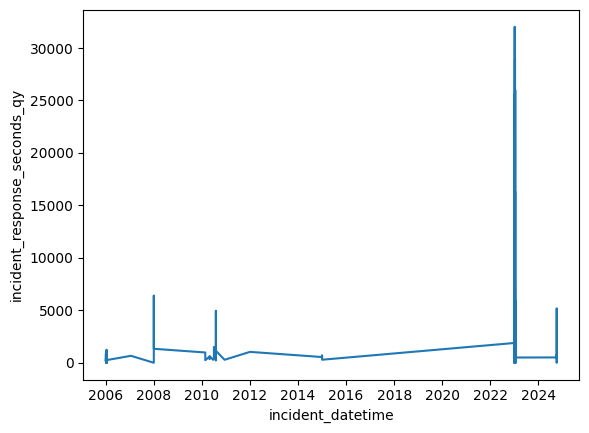

In [37]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')

(0.0, 1000.0)

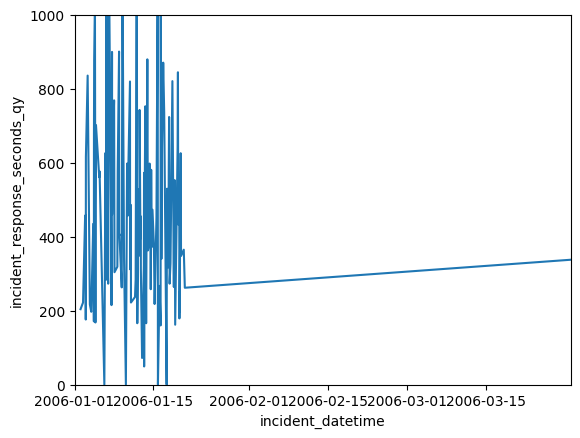

In [38]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-03-30"))
plt.ylim(0,1000)

# I initially wanted to look at the fluctuation in 2006

In [39]:
(time_df['incident_response_seconds_qy']==0 ).sum()

np.int64(426)

## Response time values equal to 0 are not meaningful in practice, so they were considered missing and replaced with NaN during EDA.

In [40]:
time_df['incident_response_seconds_qy'] = time_df['incident_response_seconds_qy'].replace(0,np.nan)

In [41]:
time_df.isna().sum()

incident_datetime                  0
incident_response_seconds_qy    3068
dtype: int64

(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

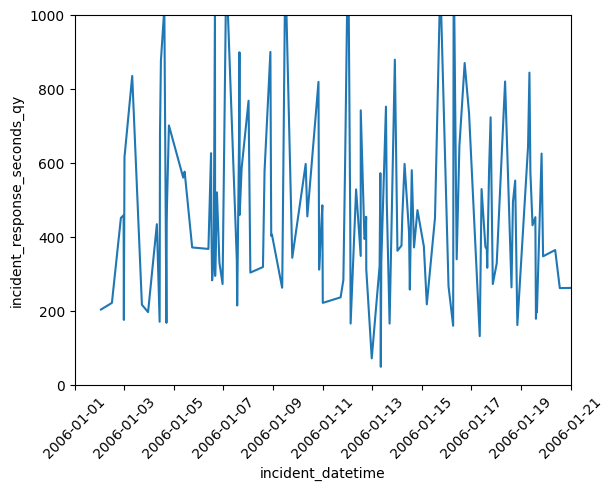

In [42]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1000)
plt.xticks(rotation=45)

In [43]:
time_df['incident_travel_tm_seconds_qy'] = main_df['incident_travel_tm_seconds_qy'].copy()

In [44]:
time_df


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy
0,2023-01-01 00:00:02,1887.0,477.0
1,2023-01-01 00:00:16,7365.0,7299.0
2,2023-01-01 00:00:30,479.0,365.0
3,2023-01-01 00:01:35,3725.0,0.0
4,2023-01-01 00:01:55,2108.0,801.0
...,...,...,...
59995,2023-01-14 18:13:18,285.0,267.0
59996,2023-01-14 18:13:31,537.0,516.0
59997,2023-01-14 18:13:54,636.0,558.0
59998,2023-01-14 18:13:59,158.0,145.0


In [45]:
(time_df['incident_travel_tm_seconds_qy']==0).sum()

np.int64(525)

In [46]:
time_df['incident_travel_tm_seconds_qy'] = time_df['incident_travel_tm_seconds_qy'].replace(0,np.nan)

<Axes: xlabel='incident_datetime', ylabel='incident_travel_tm_seconds_qy'>

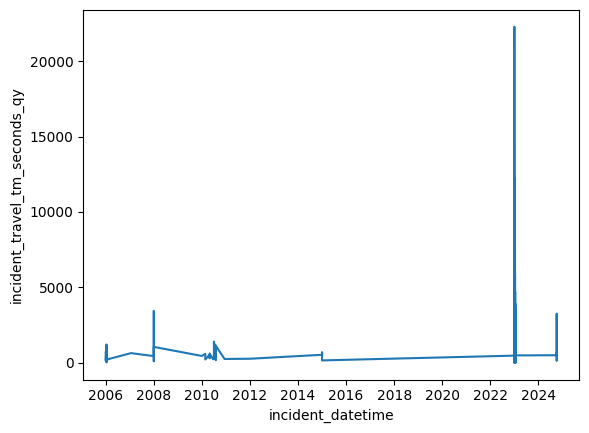

In [47]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_travel_tm_seconds_qy')

(0.0, 1500.0)

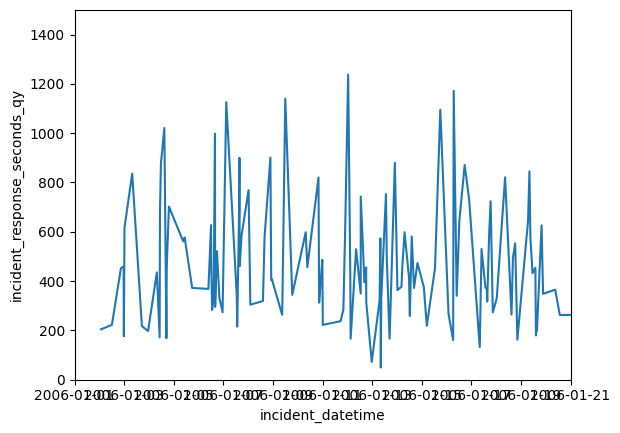

In [48]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)


(0.0, 1500.0)

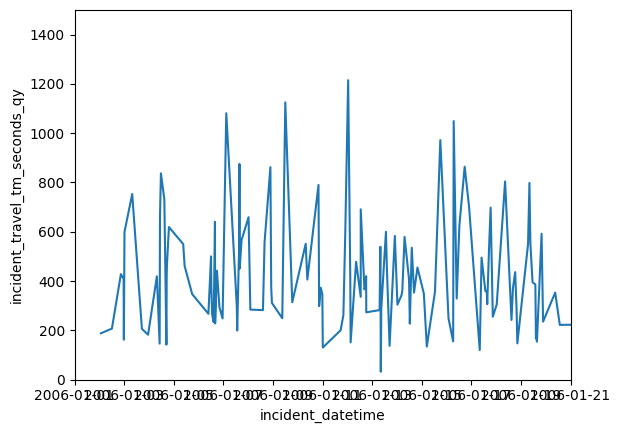

In [49]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_travel_tm_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)

## NYC emergency response times in early January 2006 show sustained high variability with frequent extreme delays, indicating systemic stress rather than isolated incidents or random noise.This assumption will be tested using other available features in the dataset.

In [50]:
time_df['dispatch_response_seconds_qy'] = main_df['dispatch_response_seconds_qy'].copy()

In [51]:
time_df

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy
0,2023-01-01 00:00:02,1887.0,477.0,1410
1,2023-01-01 00:00:16,7365.0,7299.0,66
2,2023-01-01 00:00:30,479.0,365.0,114
3,2023-01-01 00:01:35,3725.0,NaN,3725
4,2023-01-01 00:01:55,2108.0,801.0,1307
...,...,...,...,...
59995,2023-01-14 18:13:18,285.0,267.0,18
59996,2023-01-14 18:13:31,537.0,516.0,21
59997,2023-01-14 18:13:54,636.0,558.0,78
59998,2023-01-14 18:13:59,158.0,145.0,13


<Axes: xlabel='incident_datetime', ylabel='dispatch_response_seconds_qy'>

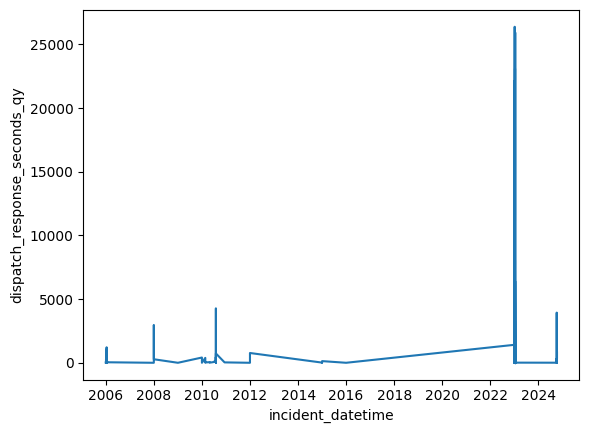

In [52]:
sns.lineplot(data=time_df,x='incident_datetime',y='dispatch_response_seconds_qy')

In [53]:
time_df.corr()

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy
incident_datetime,1.000000,0.009481,0.013546,0.006427
incident_response_seconds_qy,0.009481,1.000000,0.560433,0.895075
incident_travel_tm_seconds_qy,0.013546,0.560433,1.000000,0.126152
dispatch_response_seconds_qy,0.006427,0.895075,0.126152,1.000000


(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

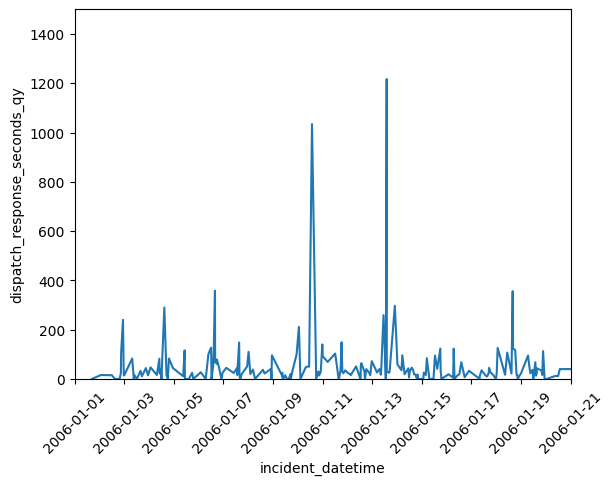

In [54]:
sns.lineplot(data=time_df,x='incident_datetime',y='dispatch_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)
plt.xticks(rotation=45)

In [55]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy     3068
incident_travel_tm_seconds_qy    3163
dispatch_response_seconds_qy        0
dtype: int64

In [56]:
(time_df['dispatch_response_seconds_qy']==0).sum()

np.int64(1208)

In [57]:
time_df['dispatch_response_seconds_qy']=time_df['dispatch_response_seconds_qy'].replace(0,np.nan)


(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

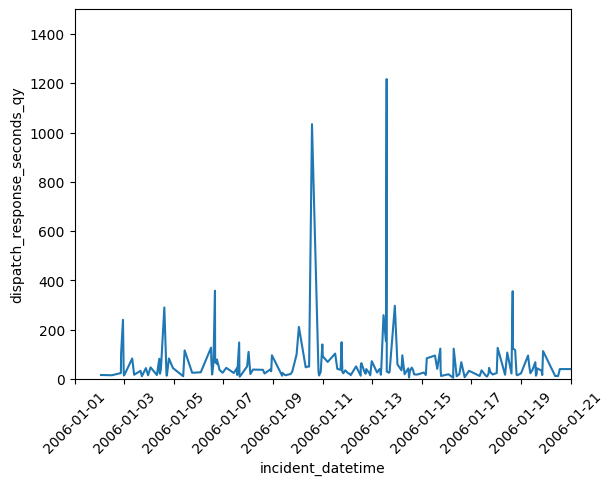

In [58]:
sns.lineplot(data=time_df,x='incident_datetime',y='dispatch_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)
plt.xticks(rotation=45)

In [59]:
time_df['special_event_indicator']=main_df['special_event_indicator'].copy()

In [60]:
time_df['special_event_indicator'].value_counts()

special_event_indicator
N    59999
Y        1
Name: count, dtype: int64

In [61]:
time_df.loc[time_df['special_event_indicator']=='Y']

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator
2013,2010-01-01 00:00:21,NaN,455.0,NaN,Y


In [62]:
time_df['held_indicator']=main_df['held_indicator'].copy()

In [63]:
time_df['held_indicator'].value_counts()

held_indicator
N    53364
Y     6636
Name: count, dtype: int64

(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

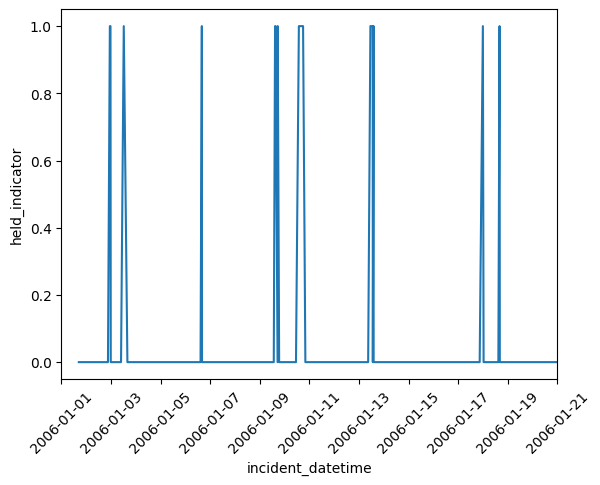

In [64]:
sns.lineplot(data=time_df,x='incident_datetime',y=(time_df['held_indicator'] == 'Y').astype(int))
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.xticks(rotation=45)

## Taken together, the sustained volatility in response times, intermittent spikes in dispatch delays, and the temporal clustering of held calls suggest that early January 2006 was characterized by systemic operational stress in NYC emergency services rather than random noise or isolated incidents.

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

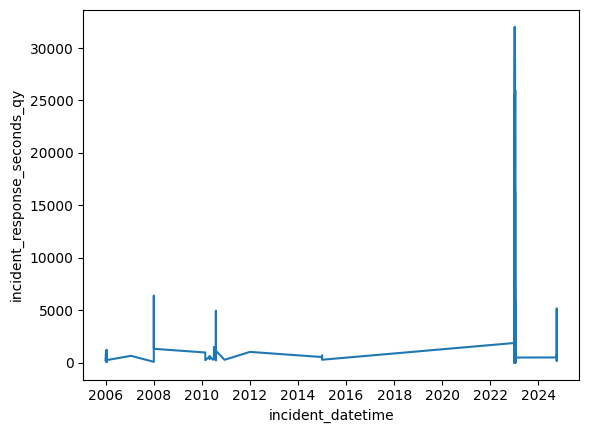

In [65]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')

In [66]:
(time_df['incident_response_seconds_qy']==0).sum()

np.int64(0)

(15.0, 6900.0)

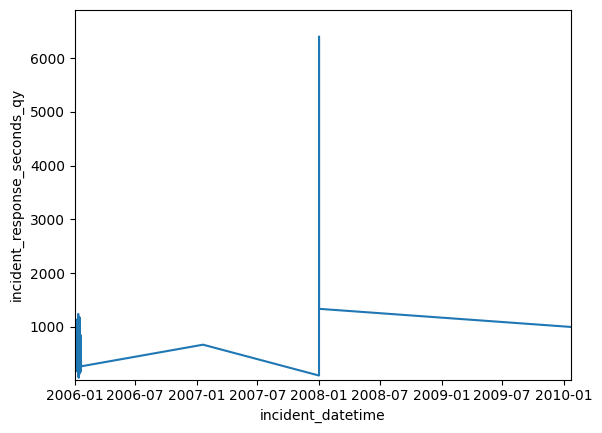

In [67]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2010-01-21"))
plt.ylim(15,6900)

In [68]:
main_df.groupby('incident_datetime')['incident_response_seconds_qy'].mean()

incident_datetime
2006-01-01T16:49:57.000      NaN
2006-01-02T01:34:07.000    204.0
2006-01-02T12:09:26.000    222.0
2006-01-02T15:07:11.000      NaN
2006-01-02T19:36:53.000      NaN
                           ...  
2024-10-06T05:35:33.000    519.0
2024-10-06T05:35:57.000      NaN
2024-10-06T05:36:04.000    337.0
2024-10-06T05:56:56.000    721.0
2024-10-06T05:57:50.000      NaN
Name: incident_response_seconds_qy, Length: 58615, dtype: float64

In [69]:
time_df['incident_datetime']

0       2023-01-01 00:00:02
1       2023-01-01 00:00:16
2       2023-01-01 00:00:30
3       2023-01-01 00:01:35
4       2023-01-01 00:01:55
                ...        
59995   2023-01-14 18:13:18
59996   2023-01-14 18:13:31
59997   2023-01-14 18:13:54
59998   2023-01-14 18:13:59
59999   2023-01-14 18:14:35
Name: incident_datetime, Length: 60000, dtype: datetime64[ns]

In [70]:
time_df.set_index('incident_datetime') .resample('D')['incident_response_seconds_qy'].mean()

incident_datetime
2006-01-01           NaN
2006-01-02    302.600000
2006-01-03    466.500000
2006-01-04    552.888889
2006-01-05    503.333333
                 ...    
2024-10-02           NaN
2024-10-03           NaN
2024-10-04           NaN
2024-10-05    996.653061
2024-10-06    739.785714
Freq: D, Name: incident_response_seconds_qy, Length: 6854, dtype: float64

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_64612/1319922450.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sns.lineplot(time_df.set_index('incident_datetime') .resample('H')['incident_response_seconds_qy'].mean())


(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

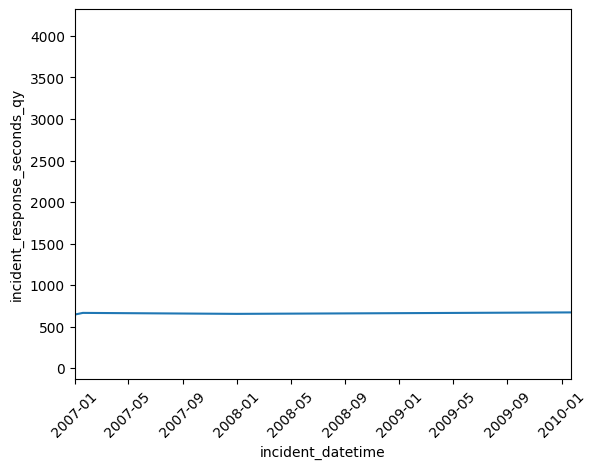

In [71]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('H')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

## The goal was to analyze the yearly distribution of incident_response_seconds_qy to check for outliers and identify extreme values.

(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

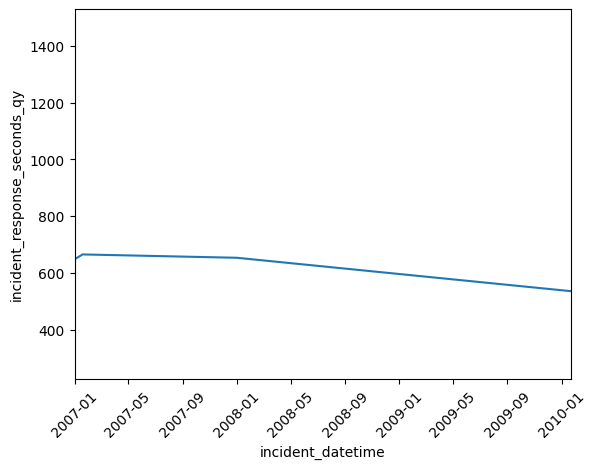

In [72]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('D')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_64612/3437593380.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(time_df.set_index('incident_datetime') .resample('M')['incident_response_seconds_qy'].mean())


(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

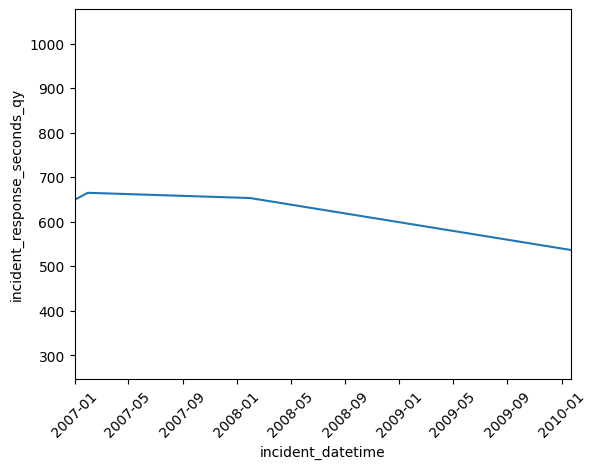

In [73]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('M')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_64612/4010724188.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sns.lineplot(time_df.set_index('incident_datetime') .resample('Y')['incident_response_seconds_qy'].mean())


(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

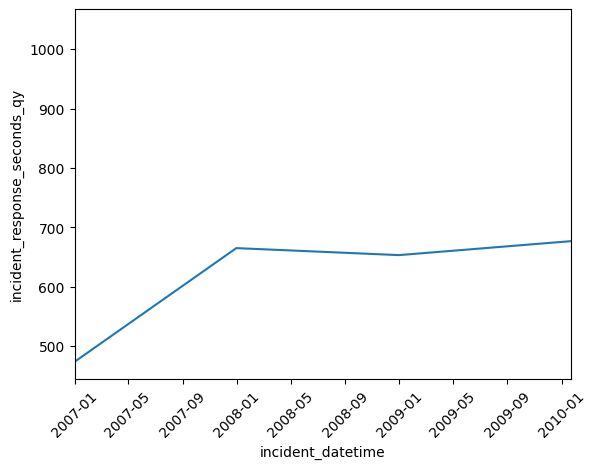

In [74]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('Y')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

## When I look at the data hourly, daily, monthly, and yearly, the high point in 2008 disappears. This suggests that it may be an outlier, and I will check.

(np.float64(13848.0), np.float64(14029.0))

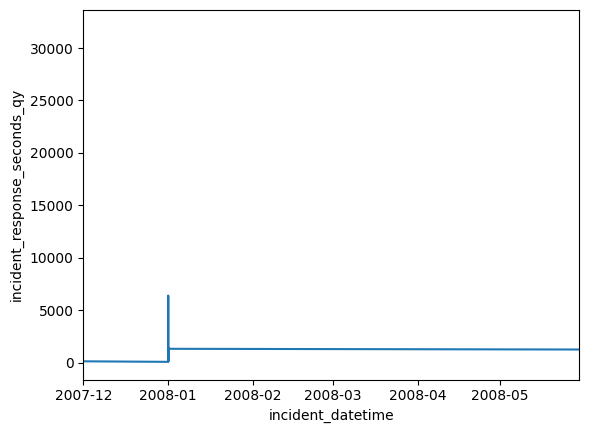

In [75]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2007-12-01"),pd.to_datetime("2008-05-30"))


(array([13877. , 13877.5, 13878. , 13878.5, 13879. , 13879.5, 13880. ,
        13880.5, 13881. ]),
 [Text(13877.0, 0, '12-30 00'),
  Text(13877.5, 0, '12-30 12'),
  Text(13878.0, 0, '12-31 00'),
  Text(13878.5, 0, '12-31 12'),
  Text(13879.0, 0, '01-01 00'),
  Text(13879.5, 0, '01-01 12'),
  Text(13880.0, 0, '01-02 00'),
  Text(13880.5, 0, '01-02 12'),
  Text(13881.0, 0, '01-03 00')])

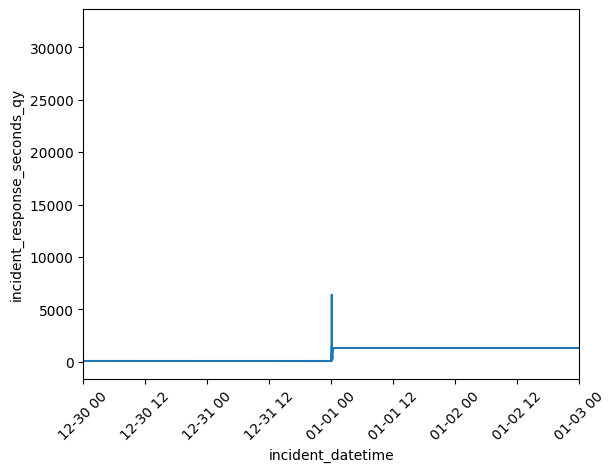

In [76]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2007-12-30"),pd.to_datetime("2008-01-03"))
plt.xticks(rotation=45)


(1.0, 8500.0)

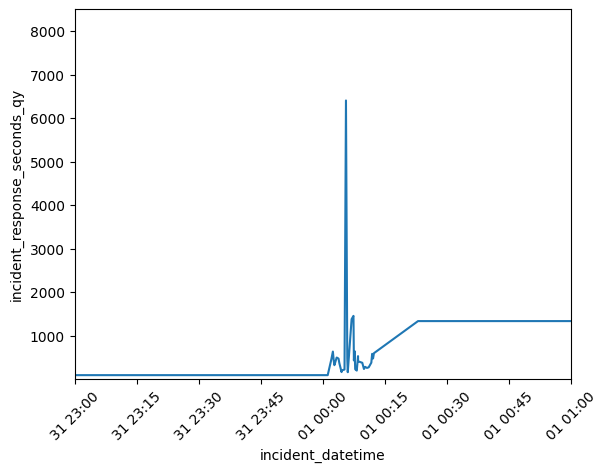

In [77]:
plt.Figure(figsize=(16,3))
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2007-12-31 23"),pd.to_datetime("2008-01-01 01"))
plt.xticks(rotation=45)
plt.ylim(1,8500)


In [78]:
raw_2006 = time_df[(time_df['incident_datetime'].dt.year == 2006)].copy()

In [79]:
raw_2006.sort_values('incident_response_seconds_qy',ascending=False).head(5)


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
34067,2006-01-12 00:47:29,1238.0,1215.0,23.0,N,N
46517,2006-01-16 06:55:40,1172.0,1049.0,123.0,N,N
25961,2006-01-09 11:56:15,1140.0,1125.0,15.0,N,N
19352,2006-01-07 02:50:00,1126.0,1081.0,45.0,N,N
45227,2006-01-15 17:58:11,1095.0,972.0,123.0,N,N


In [80]:
raw_2008 = time_df[
    (time_df['incident_datetime'].dt.year == 2008)
].copy()

In [81]:
raw_2008.sort_values('incident_response_seconds_qy',ascending=False).head(30)


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
21092,2008-01-01 00:05:40,6406.0,3438.0,2968.0,N,Y
29058,2008-01-01 00:07:29,1453.0,628.0,825.0,N,Y
28277,2008-01-01 00:07:02,1378.0,478.0,900.0,N,Y
20134,2008-01-01 00:23:06,1333.0,1056.0,277.0,N,N
30419,2008-01-01 00:07:46,641.0,565.0,76.0,N,N
7400,2008-01-01 00:02:30,632.0,601.0,31.0,N,N
58361,2008-01-01 00:12:26,595.0,535.0,60.0,N,N
55638,2008-01-01 00:12:00,580.0,525.0,55.0,N,N
36823,2008-01-01 00:08:35,527.0,493.0,34.0,N,N
12574,2008-01-01 00:03:25,495.0,363.0,132.0,N,N


## 2008 has a outlier
## These points are outliers in size, but they represent real delays, not data errors, so i didn’t remove them.

(array([18993., 19052., 19113., 19174., 19236., 19297., 19358., 19417.,
        19478.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05')])

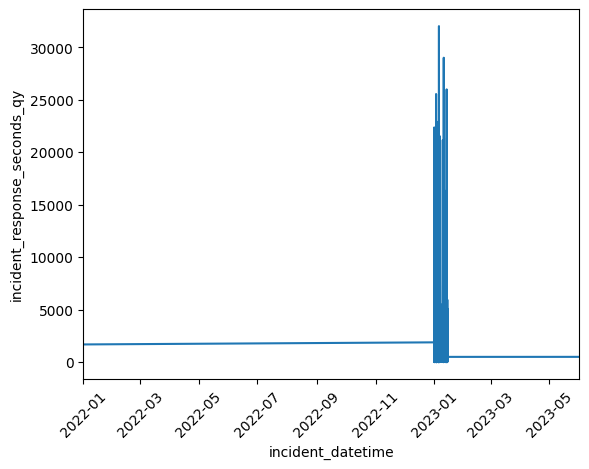

In [82]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2022"),pd.to_datetime("2023-06"))
plt.xticks(rotation=45)



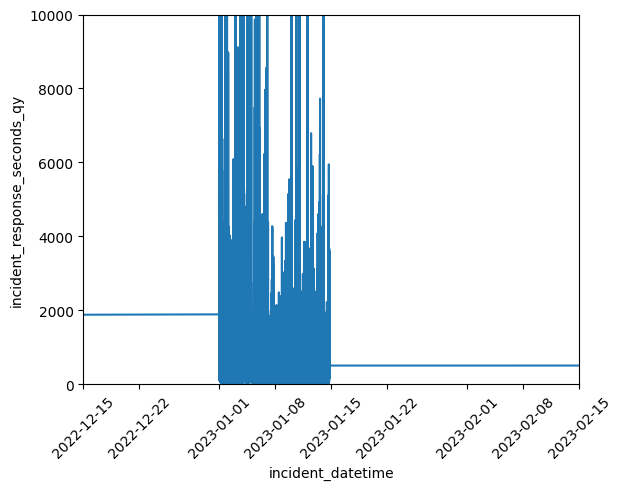

In [85]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2022-12-15"),pd.to_datetime("2023-02-15"))
plt.ylim(0, 10000)   
plt.xticks(rotation=45)
plt.show()


In [86]:
raw_2023 = time_df[
    (time_df['incident_datetime'].dt.year == 2023)
].copy()

In [89]:
raw_2023.sort_values('incident_response_seconds_qy',ascending=False).head(60)


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
23382,2023-01-06 00:00:06,32022.0,5642.0,26380.0,N,Y
44337,2023-01-11 00:00:10,29011.0,5916.0,23095.0,N,N
57208,2023-01-14 00:00:22,25995.0,66.0,25929.0,N,N
9347,2023-01-03 00:24:29,25554.0,3417.0,22137.0,N,N
23383,2023-01-06 00:00:09,24039.0,632.0,23407.0,N,N
44343,2023-01-11 00:01:32,23449.0,1083.0,22366.0,N,N
18836,2023-01-05 00:00:13,22899.0,1578.0,21321.0,N,N
18834,2023-01-05 00:00:07,22694.0,1336.0,21358.0,N,N
14018,2023-01-04 00:00:52,22369.0,697.0,21672.0,N,N
532,2023-01-01 01:59:06,22367.0,22272.0,95.0,N,Y


In [90]:
time_df[(time_df['incident_datetime'] >= "2023-01-01 00:00") &(time_df['incident_datetime'] <= "2023-01-01 06:00")][['incident_datetime', 'incident_response_seconds_qy']]


,incident_datetime,incident_response_seconds_qy
0,2023-01-01 00:00:02,1887.0
1,2023-01-01 00:00:16,7365.0
2,2023-01-01 00:00:30,479.0
3,2023-01-01 00:01:35,3725.0
4,2023-01-01 00:01:55,2108.0
...,...,...
1232,2023-01-01 05:58:44,3098.0
1233,2023-01-01 05:58:49,1022.0
1234,2023-01-01 05:59:47,NaN
1235,2023-01-01 05:59:54,NaN
